In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 409.0 kB/s eta 0:00:00m eta 0:00:010:00:10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 514.5 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 185.1 kB/s eta 0:00:001m168.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 187.8 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 952.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━

In [25]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from scipy import signal

In [26]:
df_scratch = pd.read_csv('/home/nine/ecz-ware/training/data/emg_scratch.csv')
df_rest = pd.read_csv('/home/nine/ecz-ware/training/data/emg_rest.csv')
df_scratch

,timestamp,v1,v2,label
0,1752471222,1.508,1.633,1
1,1752471222,1.532,1.742,1
2,1752471222,1.504,1.654,1
3,1752471222,1.534,1.758,1
4,1752471222,1.506,1.628,1
...,...,...,...,...
1495,1752471233,1.447,1.580,1
1496,1752471233,1.409,1.716,1
1497,1752471233,1.519,1.577,1
1498,1752471233,1.478,1.699,1


In [59]:
scratch_data = df_scratch['v2'].to_numpy()
other_data = df_rest['v2'].to_numpy()

In [60]:
def cleanup(data):
    data = data - np.mean(data)
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [61]:
def get_spectrogram(data: np.ndarray):
    f, t, z = signal.stft(data, fs=200, nperseg=128, noverlap=50, nfft=128)
    spectrogram = np.abs(z)
    return f, t, spectrogram

[  0.       1.5625   3.125    4.6875   6.25     7.8125   9.375   10.9375
  12.5     14.0625  15.625   17.1875  18.75    20.3125  21.875   23.4375
  25.      26.5625  28.125   29.6875  31.25    32.8125  34.375   35.9375
  37.5     39.0625  40.625   42.1875  43.75    45.3125  46.875   48.4375
  50.      51.5625  53.125   54.6875  56.25    57.8125  59.375   60.9375
  62.5     64.0625  65.625   67.1875  68.75    70.3125  71.875   73.4375
  75.      76.5625  78.125   79.6875  81.25    82.8125  84.375   85.9375
  87.5     89.0625  90.625   92.1875  93.75    95.3125  96.875   98.4375
 100.    ] [0.   0.39 0.78 1.17 1.56 1.95 2.34 2.73 3.12 3.51 3.9  4.29 4.68 5.07
 5.46 5.85 6.24 6.63 7.02 7.41 7.8 ]


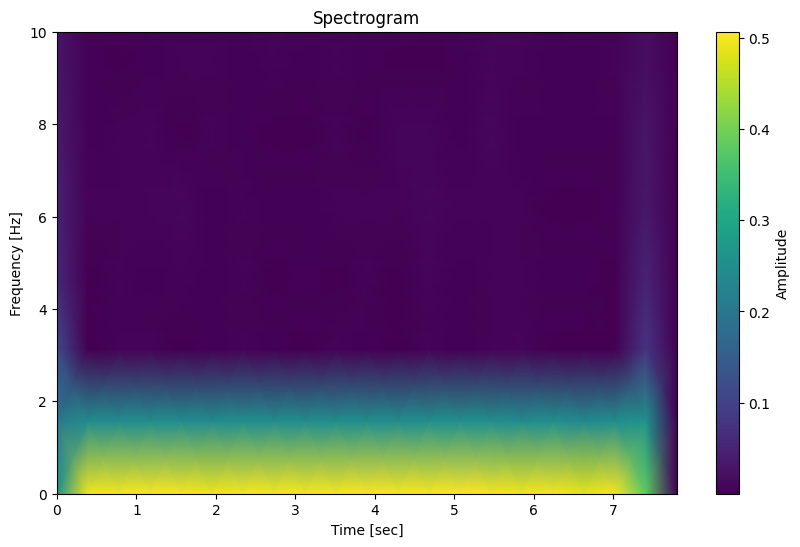

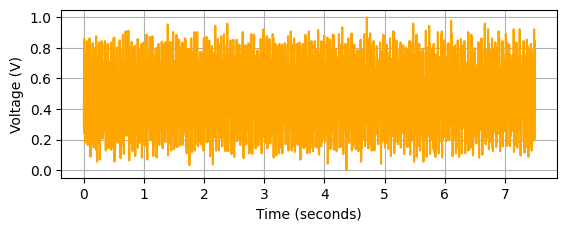

In [ ]:
current_array = other_data
cleaned = cleanup(current_array)
f, t, s = get_spectrogram(cleaned)
# print(f, t)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, s, shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Amplitude')
plt.ylim(0, 10)  # limit frequency range to make plot clearer
plt.show()

time = np.arange(len(current_array)) / 200.0  

plt.subplot(2, 1, 2)
plt.plot(time, cleaned, label='Centered EMG Voltage', color='orange')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (seconds)')

plt.grid(True)